****Character interaction in GOT books Series****




In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd #data manipulation
mpl_params = {
    "axes.titlesize": 20,
    "figure.figsize": (12, 4),
}
plt.rcParams.update(mpl_params)

In [40]:
books_df=pd.read_csv("https://raw.githubusercontent.com/NirmalaKTomar/CICIDS2017_Sample_dataset/main/book.csv")
books_df.head()

Source              Target  ... weight  book
0                   Addam-Marbrand     Jaime-Lannister  ...      3     1
1                   Addam-Marbrand     Tywin-Lannister  ...      6     1
2                Aegon-I-Targaryen  Daenerys-Targaryen  ...      5     1
3                Aegon-I-Targaryen        Eddard-Stark  ...      4     1
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  ...      4     1

[5 rows x 5 columns]

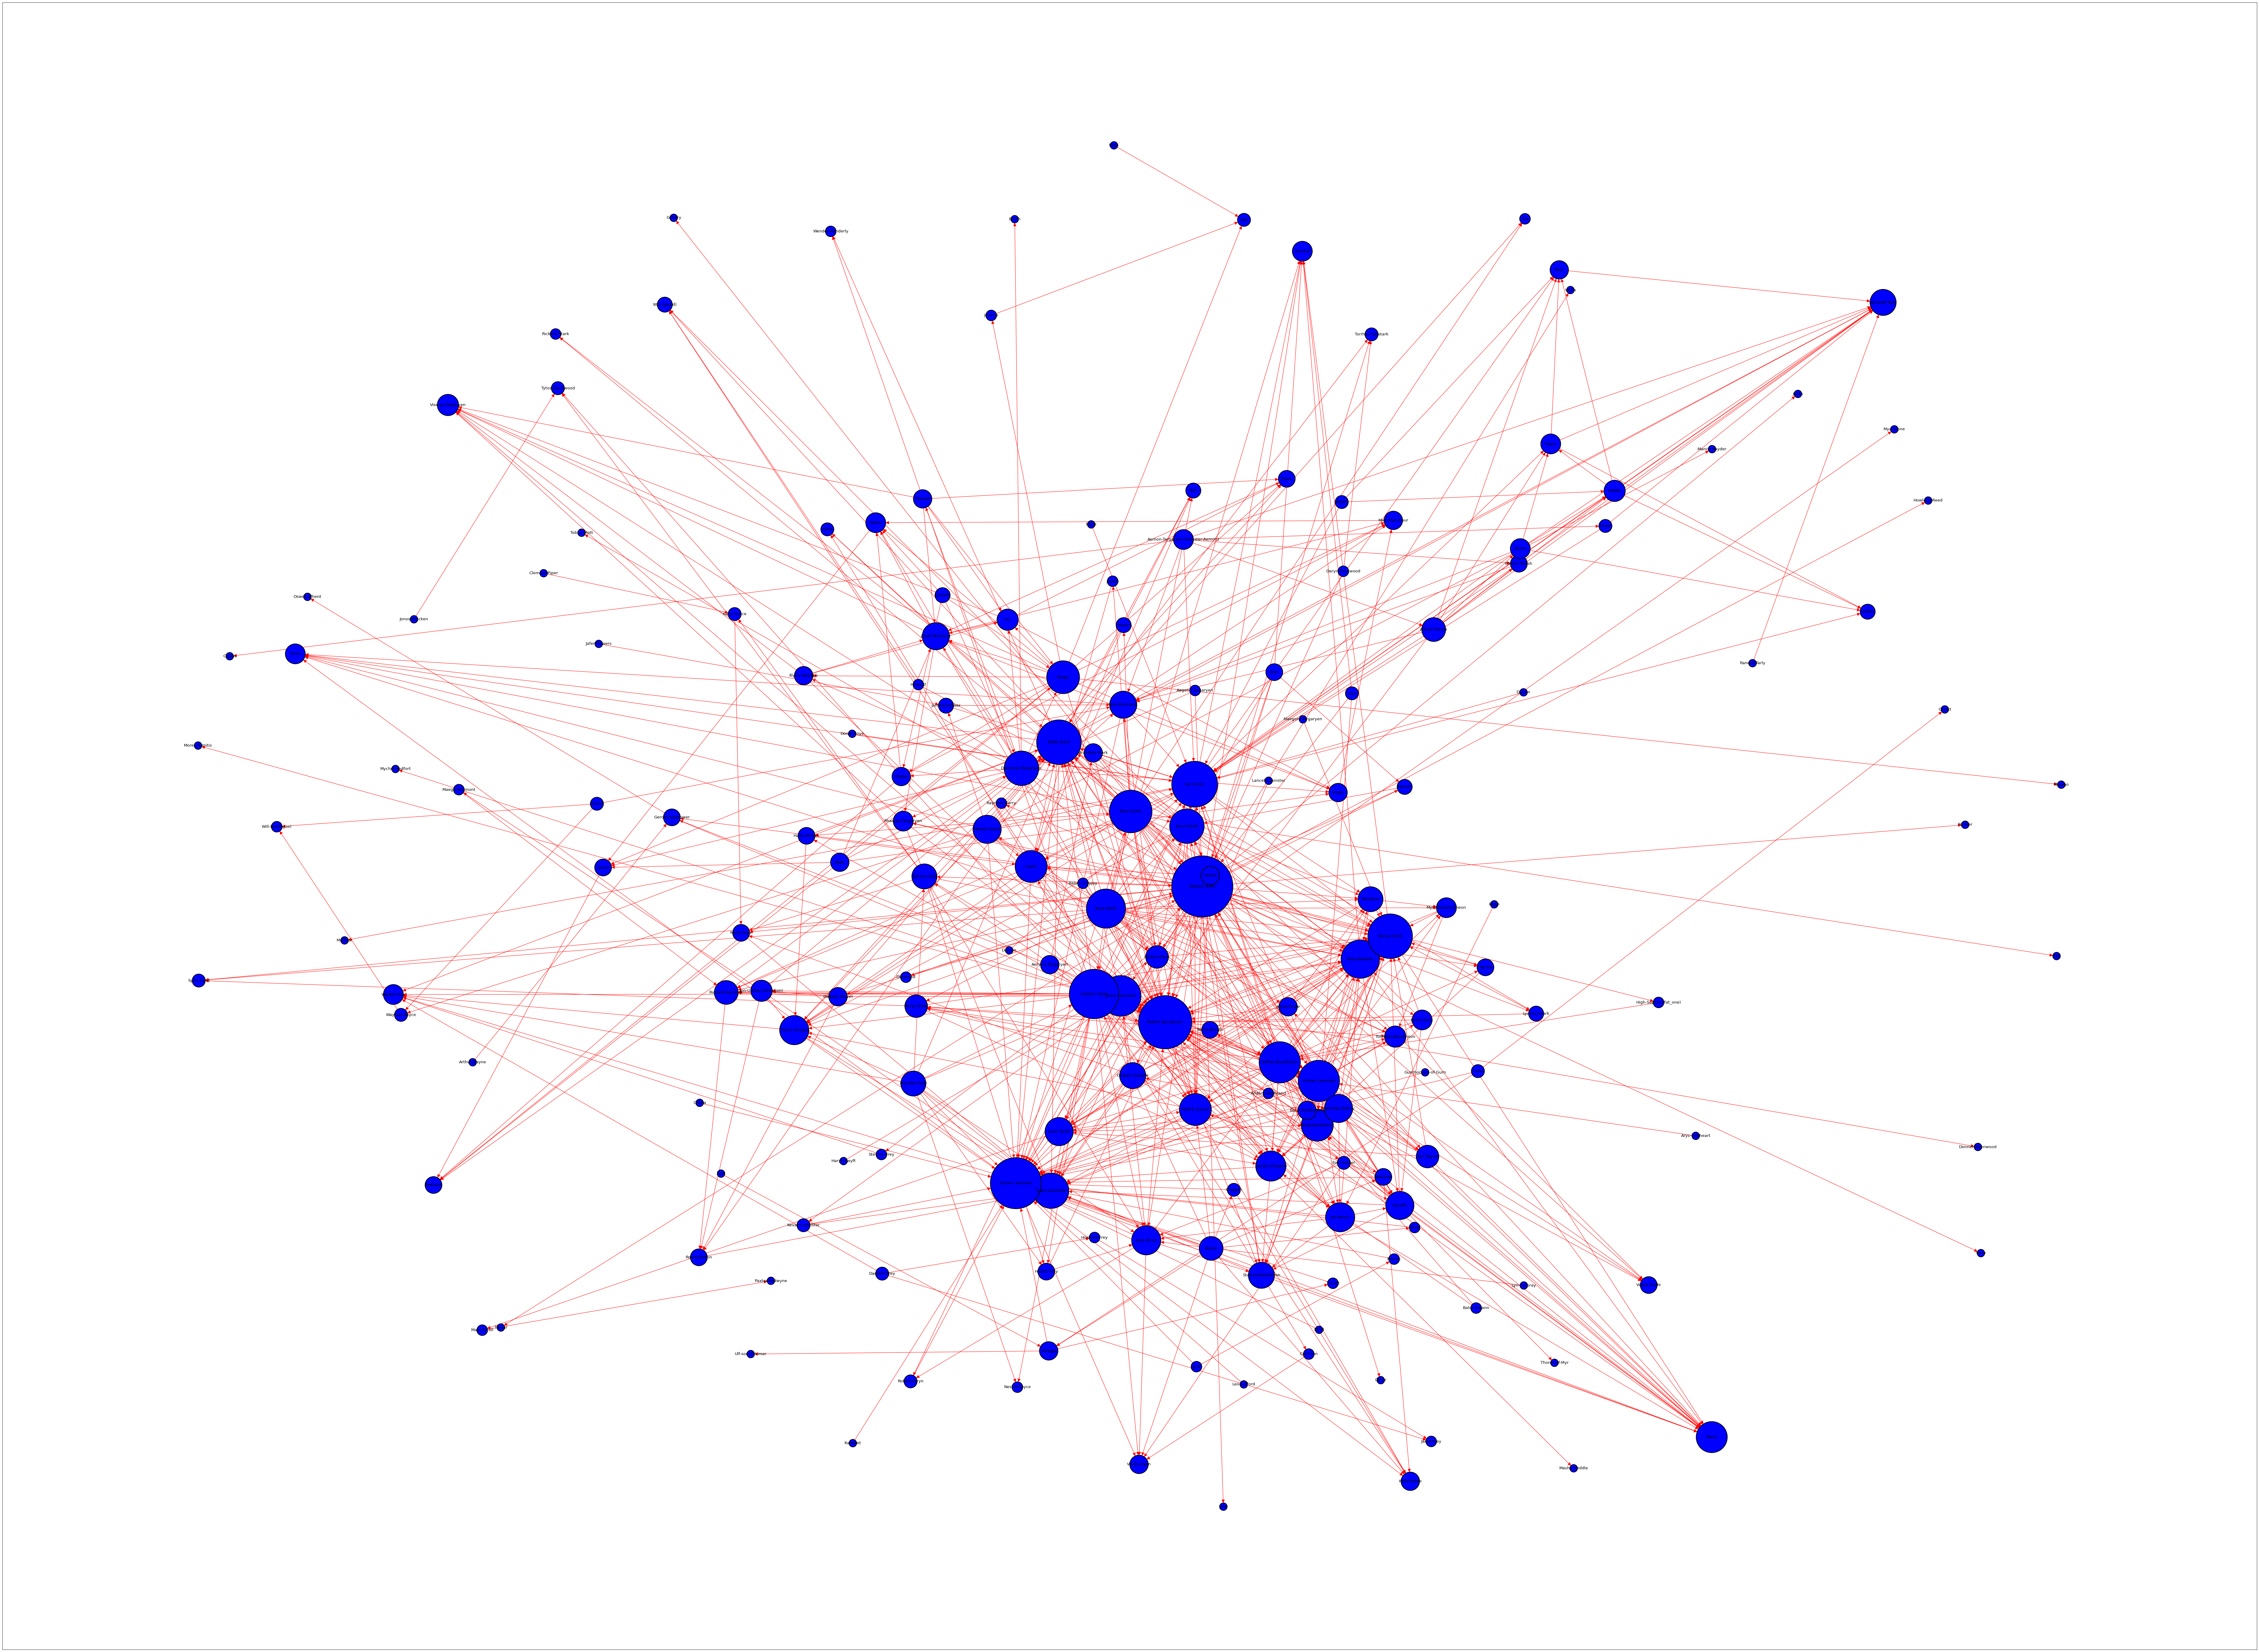

In [41]:
#creating multigraph network with nodes sized in proportion to degree centrality.
Books_graph = nx.from_pandas_edgelist(books_df, source='Source', target='Target', 
                                      create_using=nx.MultiDiGraph())
# Computing node degrees,
node_degree = nx.degree(Books_graph)

#graph visualization
layout = nx.spring_layout(Books_graph, k=0.15, iterations=20)
plt.figure(num=None, figsize=(120, 90), dpi=80)
nx.draw_networkx(Books_graph,node_size=[int(degree[1]) * 500 for degree in node_degree],arrowsize=20,linewidths=2,pos=layout,edge_color='red',edgecolors='black',node_color='blue',
    )

In [42]:
#degree computation
Degree_view=pd.DataFrame(node_degree)
Degree_view.head()

0   1
0      Addam-Marbrand   2
1     Jaime-Lannister  29
2     Tywin-Lannister  22
3   Aegon-I-Targaryen   2
4  Daenerys-Targaryen  21

In [43]:
import pandas as pd
import networkx as nx

In [44]:
New_books_df=pd.read_csv("https://raw.githubusercontent.com/NirmalaKTomar/CICIDS2017_Sample_dataset/main/book.csv")
New_books_df['weight_inv'] = 1/New_books_df.weight
#interaction b/w characters 
r_stark_df = (
 New_books_df.query("weight >=22")
 .query("Source == 'Robb-Stark'or Target == 'Robb-Stark'")
)
r_stark_df.info()
r_stark_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 134 to 637
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Source      4 non-null      object 
 1   Target      4 non-null      object 
 2   Type        4 non-null      object 
 3   weight      4 non-null      int64  
 4   book        4 non-null      int64  
 5   weight_inv  4 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 224.0+ bytes


Source         Target        Type  weight  book  weight_inv
134     Bran-Stark     Robb-Stark  Undirected     112     1    0.008929
193  Catelyn-Stark     Robb-Stark  Undirected      49     1    0.020408
501       Jon-Snow     Robb-Stark  Undirected      53     1    0.018868
637     Robb-Stark  Theon-Greyjoy  Undirected      37     1    0.027027

In [45]:
New_books_df.head()

Source              Target  ... book  weight_inv
0                   Addam-Marbrand     Jaime-Lannister  ...    1    0.333333
1                   Addam-Marbrand     Tywin-Lannister  ...    1    0.166667
2                Aegon-I-Targaryen  Daenerys-Targaryen  ...    1    0.200000
3                Aegon-I-Targaryen        Eddard-Stark  ...    1    0.250000
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  ...    1    0.250000

[5 rows x 6 columns]

In [46]:
g_characters = [nx.from_pandas_edgelist(
          New_books_df[New_books_df.book==i],
          source='Source', target='Target',
          edge_attr=['weight', 'weight_inv'])
             for i in range(1, 6)]

In [47]:
g_characters[0:]

In [48]:
relation_val = list(g_characters[0].edges(data=True))
relation_val[0:3]

[('Addam-Marbrand',
  'Jaime-Lannister',
  {'weight': 3, 'weight_inv': 0.3333333333333333}),
 ('Addam-Marbrand',
  'Tywin-Lannister',
  {'weight': 6, 'weight_inv': 0.16666666666666666}),
 ('Jaime-Lannister', 'Aerys-II-Targaryen', {'weight': 5, 'weight_inv': 0.2})]

In [49]:
# connected neighbours-
cen_list={}
for i in range(4):
  cen_list[i] = nx.degree_centrality(g_characters[i])


In [50]:
cen_list.values()

dict_values([{'Addam-Marbrand': 0.010752688172043012, 'Jaime-Lannister': 0.15591397849462366, 'Tywin-Lannister': 0.11827956989247312, 'Aegon-I-Targaryen': 0.010752688172043012, 'Daenerys-Targaryen': 0.11290322580645162, 'Eddard-Stark': 0.3548387096774194, 'Aemon-Targaryen-(Maester-Aemon)': 0.03763440860215054, 'Alliser-Thorne': 0.05376344086021506, 'Bowen-Marsh': 0.02688172043010753, 'Chett': 0.016129032258064516, 'Clydas': 0.005376344086021506, 'Jeor-Mormont': 0.06989247311827958, 'Jon-Snow': 0.19892473118279572, 'Samwell-Tarly': 0.06451612903225806, 'Aerys-II-Targaryen': 0.03225806451612903, 'Brandon-Stark': 0.03225806451612903, 'Gerold-Hightower': 0.02688172043010753, 'Jon-Arryn': 0.08064516129032259, 'Robert-Baratheon': 0.2688172043010753, 'Aggo': 0.03225806451612903, 'Drogo': 0.10215053763440861, 'Jhogo': 0.03225806451612903, 'Jorah-Mormont': 0.06989247311827958, 'Quaro': 0.02688172043010753, 'Rakharo': 0.02688172043010753, 'Albett': 0.016129032258064516, 'Halder': 0.0430107526881

In [51]:
deg_cen_book1 = nx.degree_centrality(g_characters[0])

In [52]:
deg_cen_book1['Bran-Stark']

0.17204301075268819

In [53]:
print("top 10 characters as per first book of series")
#top 10 characters in books-
sorted(deg_cen_book1.items(),
       key=lambda x:x[1],
       reverse=True)[0:10]


top 10 characters as per first book of series


[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

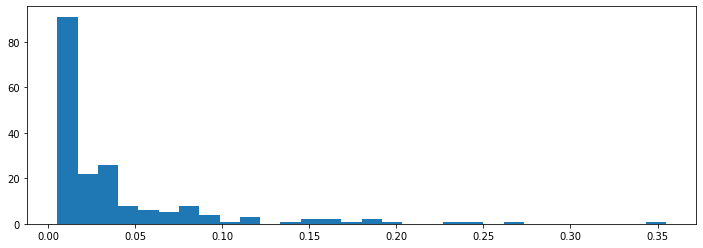

In [54]:
#centrality list visualization
import matplotlib.pyplot as plt
plt.hist(cen_list[0].values(), bins=30)
plt.show()

Adding all 5 books 

In [55]:
import pandas as pd
 
book1=pd.read_csv("https://raw.githubusercontent.com/imohitmayank/got_network_viz_python/main/data/book1.csv")
book2=pd.read_csv('https://raw.githubusercontent.com/imohitmayank/got_network_viz_python/main/data/book2.csv')
book3=pd.read_csv('https://raw.githubusercontent.com/imohitmayank/got_network_viz_python/main/data/book3.csv')
book4=pd.read_csv('https://raw.githubusercontent.com/imohitmayank/got_network_viz_python/main/data/book4.csv')
book5=pd.read_csv('https://raw.githubusercontent.com/imohitmayank/got_network_viz_python/main/data/book5.csv')

G_book1 = nx.Graph()

for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Creating a list of networks for all the books
books = [G_book1]
book_fnames = [book2,book3,book4,book5]

for ob in book_fnames:
    book = ob
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

In [56]:
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 =  sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

# Printing out the top 10 of book1 and book5
print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


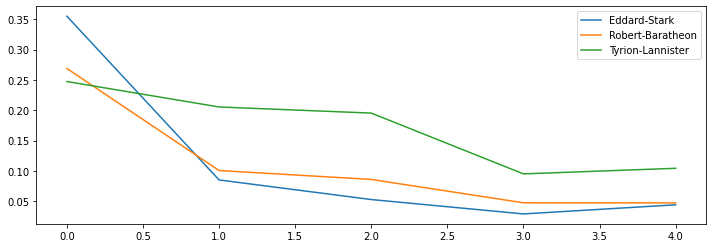

In [57]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark', 'Robert-Baratheon', 'Tyrion-Lannister']].plot()

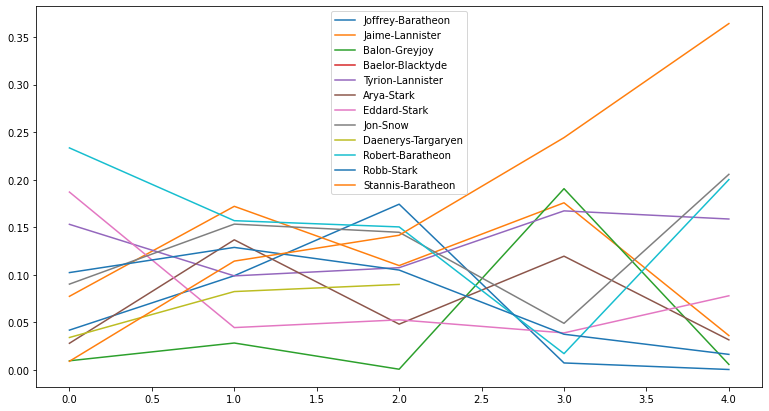

In [58]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))

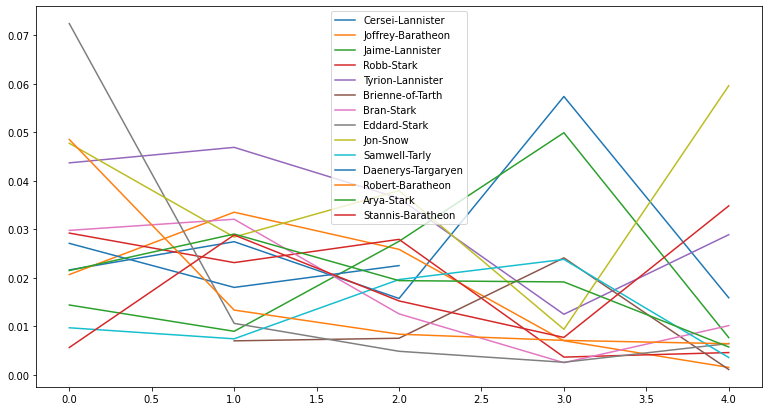

In [59]:
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))


In [60]:
# measuring the correlation of  pagerank ,betweenness centrality and degree centrality
measures = [nx.pagerank(books[4]),nx.betweenness_centrality(books[4], weight='weight'),nx.degree_centrality(books[4])]
correlation_matrix = pd.DataFrame.from_records(measures)
correlation_matrix.T.corr()

0         1         2
0  1.000000  0.793372  0.971493
1  0.793372  1.000000  0.833816
2  0.971493  0.833816  1.000000

In [61]:
p_rank, b_cent, d_cent = correlation_matrix.idxmax(axis=1)
print(f'Most involved Character by PageRank Alogrithm - {p_rank}')
print(f'Most involved Character by Betweenness Centrality Measure - {b_cent}')
print(f'Most involvedCharacter by the Degree Centrality Measure - {d_cent}')

Most involved Character by PageRank Alogrithm - Jon-Snow
Most involved Character by Betweenness Centrality Measure - Stannis-Baratheon
Most involvedCharacter by the Degree Centrality Measure - Jon-Snow


In [62]:
p_rank, b_cent, d_cent = correlation_matrix.idxmax(axis=1)

# Printing out the top character based on  pagerank and degree centrality
print(p_rank, b_cent)

Jon-Snow Stannis-Baratheon


concatenating all books

In [63]:
books = []
wd = 'https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/'
for i in range(5):
    books.append(pd.read_csv(wd + 'asoiaf-book{}-edges.csv'.format(i+1)))

In [64]:
all_books = pd.concat(books)
all_books.head()

Source              Target  ... weight  book
0                   Addam-Marbrand     Jaime-Lannister  ...      3   1.0
1                   Addam-Marbrand     Tywin-Lannister  ...      6   1.0
2                Aegon-I-Targaryen  Daenerys-Targaryen  ...      5   1.0
3                Aegon-I-Targaryen        Eddard-Stark  ...      4   1.0
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  ...      4   1.0

[5 rows x 5 columns]

In [65]:
edges = all_books.groupby(['Source','Target']).agg({'weight':'sum'}).reset_index()
edges.sort_values('weight',ascending=False).head()


Source            Target  weight
1334       Eddard-Stark  Robert-Baratheon     334
2031           Jon-Snow     Samwell-Tarly     228
1965  Joffrey-Baratheon       Sansa-Stark     222
1972  Joffrey-Baratheon  Tyrion-Lannister     219
640          Bran-Stark             Hodor     209

In [66]:
GOT = nx.from_pandas_edgelist(edges,source='Source',target='Target',edge_attr='weight' )
print(nx.info(GOT))

Graph with 796 nodes and 2823 edges


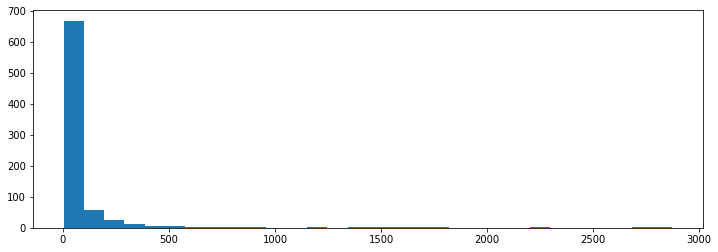

In [67]:
weighted_degrees = dict(nx.degree(GOT,weight='weight'))
max_degree = max(weighted_degrees.values())
import seaborn as sns
h = plt.hist(weighted_degrees.values(), bins = 30)

In [68]:
subG = GOT.subgraph([n for n in weighted_degrees if weighted_degrees[n]>200])
print(nx.info(subG))

Graph with 63 nodes and 496 edges


In [69]:
pos = nx.spring_layout(subG,weight='weight',iterations=20, k = 4)

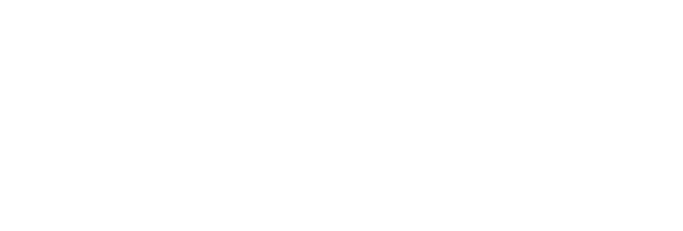

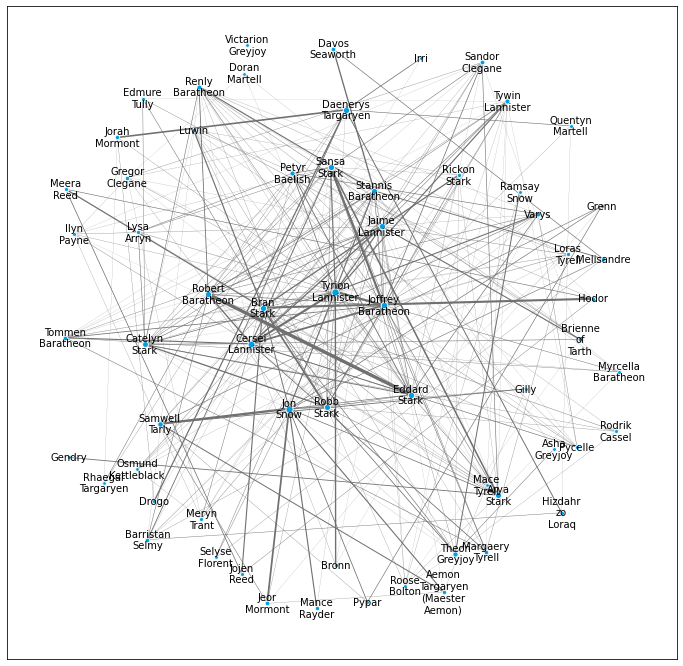

In [70]:
plt.axis('off')
plt.figure(3,figsize=(12,12)) 
for node in subG.nodes():
    size = weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subG,pos,nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')
nx.draw_networkx_labels(subG,pos,{n:n.replace('-','\n') for n in subG.nodes() if weighted_degrees[n]>100},font_size=10);

for e in subG.edges(data=True):
    if e[2]['weight']>10:
        nx.draw_networkx_edges(subG,pos,[e],width=e[2]['weight']/100,edge_color='#707070')


        

In [71]:
top = pd.DataFrame.from_dict(dict(nx.degree(subG)),orient='index').sort_values(0,ascending=False)
top.columns = ['Degree']
top['degree centrality'] =  pd.DataFrame.from_dict(dict(nx.degree(subG,weight='weight')),orient='index')
top['PageRank'] = pd.DataFrame.from_dict(dict(nx.pagerank_numpy(subG,weight='weight')),orient='index')
top['Betweenness'] =  pd.DataFrame.from_dict(dict(nx.betweenness_centrality(subG,weight='weight')),orient='index')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  after removing the cwd from sys.path.


In [72]:
top.head()


Degree  degree centrality  PageRank  Betweenness
Tyrion-Lannister       40               1842  0.052710     0.036445
Robert-Baratheon       37               1271  0.037012     0.223912
Joffrey-Baratheon      35               1518  0.042829     0.033051
Eddard-Stark           34               1330  0.037789     0.024061
Cersei-Lannister       34               1627  0.046179     0.004671